In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Load dataset
flights_data = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\flights_airport_iata.csv", low_memory=False)


In [5]:
weather_data = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\weather_iata.csv", low_memory=False)

In [6]:
print(flights_data.columns)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'latitude', 'longitude',
       'iata_dest', 'airport_name_dest', 'latitude_dest', 'longitude_dest',
       'state_abbr_dest', 'airport_ref', 'airport_ident', 'type_of_airport',
       'airport_name', 'elevation_ft', 'origin_state.1', 'municipality',
       'scheduled_service', 'unique_id', 'id', 'length_ft', 'width_ft',
       'surface', 'lighted', 'closed', 'le_ident', 'le_displaced_threshold_ft',
       'he_ident', 'he_displaced_threshold_ft'],
      

In [7]:
# Rename columns in flights_data
flights_data = flights_data.rename(columns={
    'latitude': 'origin_latitude',
    'longitude': 'origin_longitude',
    'latitude_dest': 'dest_latitude',
    'longitude_dest': 'dest_longitude'
})

# Check the updated columns to confirm the changes
print(flights_data.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'origin_latitude',
       'origin_longitude', 'iata_dest', 'airport_name_dest', 'dest_latitude',
       'dest_longitude', 'state_abbr_dest', 'airport_ref', 'airport_ident',
       'type_of_airport', 'airport_name', 'elevation_ft', 'origin_state.1',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshol

In [8]:
flights_data.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,id,length_ft,width_ft,surface,lighted,closed,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft
0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240940,12000.0,150.0,PEM,1,0,09,NaN,27,NaN
1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240941,11000.0,150.0,PEM,1,0,18C,NaN,36C,NaN
2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240943,10000.0,150.0,CON,1,0,18L,NaN,36R,NaN
3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240942,8000.0,150.0,CON,1,0,18R,NaN,36L,NaN
4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1750,...,244170,9003.0,150.0,ASP,1,0,05,NaN,23,NaN


In [169]:
# Check unique values in each delay column
unique_values = flights_data[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].nunique()
print(unique_values)


carrier_delay          1533
weather_delay           967
nas_delay               730
security_delay          182
late_aircraft_delay    1269
dtype: int64


In [9]:
print(weather_data.columns)

Index(['latitude', 'longitude', 'elevation', 'date', 'prcp', 'snow', 'snwd',
       'tmax', 'tmin', 'tobs', 'city', 'state_abbr_x', 'iata', 'airport_name',
       'state_abbr_y'],
      dtype='object')


In [10]:
weather_data[['state_abbr_x', 'state_abbr_y']]


,state_abbr_x,state_abbr_y
0,al,al
1,al,al
2,al,al
3,al,al
4,al,al
...,...,...
146017,wy,wy
146018,wy,wy
146019,wy,wy
146020,wy,wy


In [11]:
weather_data = weather_data.drop(columns=['state_abbr_x', 'state_abbr_y'])
#weather_data = weather_data.rename(columns={'state_abbr_y': 'state'})


In [12]:
# # Rename columns in weather_data
# weather_data = weather_data.rename(columns={
#     'latitude': 'origin_latitude',
#     'longitude': 'origin_longitude',
#     'latitude_dest': 'dest_latitude',
#     'longitude_dest': 'dest_longitude'
# })

In [13]:
# Merge for destination weather data
combined_data = flights_data.merge(
    weather_data,
    left_on=['date', 'dest_iata'],
    right_on=['date', 'iata'],
    how='left',
    suffixes=('', '_dest')
)

# Check the columns after the merge
print("After merging with destination weather:")
print(combined_data.columns)


After merging with destination weather:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'origin_latitude',
       'origin_longitude', 'iata_dest', 'airport_name_dest', 'dest_latitude',
       'dest_longitude', 'state_abbr_dest', 'airport_ref', 'airport_ident',
       'type_of_airport', 'airport_name', 'elevation_ft', 'origin_state.1',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold

In [14]:
# Merge for origin_iata weather data
combined_data = flights_data.merge(
    weather_data,
    left_on=['date', 'origin_iata'],
    right_on=['date', 'iata'],
    how='left',
    suffixes=('', '_dest')
)

# Check the columns after the second merge
print("After merging with origin_iata weather:")
print(combined_data.columns)


After merging with origin_iata weather:
Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'iata', 'origin_latitude',
       'origin_longitude', 'iata_dest', 'airport_name_dest', 'dest_latitude',
       'dest_longitude', 'state_abbr_dest', 'airport_ref', 'airport_ident',
       'type_of_airport', 'airport_name', 'elevation_ft', 'origin_state.1',
       'municipality', 'scheduled_service', 'unique_id', 'id', 'length_ft',
       'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().sum() / len(combined_data) * 100

# Print the results
print(missing_percentage)

day_of_week           0.000000
date                  0.000000
op_unique_carrier     0.000000
tail_num              0.282671
op_carrier_fl_num     0.000000
                       ...    
tmin                 89.523344
tobs                 99.938795
city                 89.251474
iata_dest            89.251474
airport_name_dest    89.251474
Length: 71, dtype: float64


In [16]:

# Check for NaN rows if necessary
nan_rows = combined_data[combined_data['iata'].isnull()]
print(nan_rows)


Empty DataFrame
Columns: [day_of_week, date, op_unique_carrier, tail_num, op_carrier_fl_num, origin_iata, origin_city, dest_iata, dest_city, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, distance_group, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_state, dest_state, iata, origin_latitude, origin_longitude, iata_dest, airport_name_dest, dest_latitude, dest_longitude, state_abbr_dest, airport_ref, airport_ident, type_of_airport, airport_name, elevation_ft, origin_state.1, municipality, scheduled_service, unique_id, id, length_ft, width_ft, surface, lighted, closed, le_ident, le_displaced_threshold_ft, he_ident, he_displaced_threshold_ft, latitude, longitude, elevation, prcp, snow, snwd, tmax, tmin, tobs, city, iata_dest, airport_name_dest]
Index: []

[0 rows x 71 columns]


In [17]:
# Define the columns to be removed
columns_to_remove = [
    'latitude', 'longitude', 'municipality',
    'elevation', 'prcp', 'snow', 'snwd',
    'tmax', 'tmin', 'tobs', 'city',
    'origin_state.1', 'iata', 'state_abbr_dest', 'airport_ident'
]

# Drop the specified columns
combined_data = combined_data.drop(columns=columns_to_remove, errors='ignore')

# Check the new shape of the DataFrame
print("New data shape after removing specified columns:", combined_data.shape)


New data shape after removing specified columns: (15220878, 56)


In [18]:
combined_data.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,width_ft,surface,lighted,closed,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft,iata_dest,airport_name_dest
0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,150.0,PEM,1,0,09,NaN,27,NaN,NaN,NaN
1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,150.0,PEM,1,0,18C,NaN,36C,NaN,NaN,NaN
2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,150.0,CON,1,0,18L,NaN,36R,NaN,NaN,NaN
3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,150.0,CON,1,0,18R,NaN,36L,NaN,NaN,NaN
4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1750,...,150.0,ASP,1,0,05,NaN,23,NaN,NaN,NaN


In [19]:
# Remove duplicate rows from the DataFrame
# Remove duplicate rows, keeping 'origin_state' and 'dest_state'
combined_data = combined_data.drop_duplicates(subset=combined_data.columns.difference(['origin_state', 'dest_state']).tolist())

# Display the shape of the cleaned DataFrame to check for changes
print("Shape of DataFrame after removing duplicate rows:")
print(combined_data.shape)

# Optionally, display the first few rows to verify
print("First few rows of the cleaned DataFrame:")
print(combined_data.head())

Shape of DataFrame after removing duplicate rows:
(15094416, 56)
First few rows of the cleaned DataFrame:
   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...  width_ft  \
0         cvg  cincinnati       msp  minneapolis          1234  ...     150.0   
1         cvg  cincinnati       msp  minneapolis          1234  ...     150.0   
2         cvg  cincinnati       msp  minneapolis          1234  ...     150.0   
3         cvg  cincinnati       msp  minneapolis          1234  ...     150.0   
4         dsm  des moines       

In [20]:
print(combined_data.shape)
print(weather_data.shape) 
print(flights_data.shape)  


(15094416, 56)
(146022, 13)
(15094416, 59)


In [21]:
# Check for missing values
print(combined_data.isnull().sum())

day_of_week                         0
date                                0
op_unique_carrier                   0
tail_num                        42493
op_carrier_fl_num                   0
origin_iata                         0
origin_city                         0
dest_iata                           0
dest_city                           0
crs_dep_time                        0
dep_time                       163508
taxi_out                       169914
wheels_off                     169914
wheels_on                      175134
taxi_in                        175134
crs_arr_time                        0
arr_time                       175127
cancelled                           0
diverted                            0
crs_elapsed_time                    0
actual_elapsed_time            207302
air_time                       207302
flights                             0
distance                            0
distance_group                      0
carrier_delay                11970618
weather_dela

In [22]:
# Drop the specified columns
combined_data = combined_data.drop(columns=['iata_dest', 'airport_name_dest'])

# Print the new shape of the DataFrame to confirm the columns were removed
print("New data shape after removing specified columns:", combined_data.shape)


New data shape after removing specified columns: (15094416, 52)


In [23]:
combined_data.columns

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft'],
      dtype='object')

In [24]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().sum() / len(combined_data) * 100

# Print the results
print(missing_percentage)


day_of_week                   0.000000
date                          0.000000
op_unique_carrier             0.000000
tail_num                      0.281515
op_carrier_fl_num             0.000000
origin_iata                   0.000000
origin_city                   0.000000
dest_iata                     0.000000
dest_city                     0.000000
crs_dep_time                  0.000000
dep_time                      1.083235
taxi_out                      1.125675
wheels_off                    1.125675
wheels_on                     1.160257
taxi_in                       1.160257
crs_arr_time                  0.000000
arr_time                      1.160211
cancelled                     0.000000
diverted                      0.000000
crs_elapsed_time              0.000000
actual_elapsed_time           1.373369
air_time                      1.373369
flights                       0.000000
distance                      0.000000
distance_group                0.000000
carrier_delay            

In [25]:
# Impute missing values for numerical variables using median
for col in ['dep_time', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
            'arr_time', 'actual_elapsed_time', 'air_time']:
    combined_data[col] = combined_data[col].fillna(combined_data[col].median())

# Impute missing values for the categorical variable
combined_data['tail_num'] = combined_data['tail_num'].fillna(combined_data['tail_num'].mode()[0])

In [26]:
# Calculate the percentage of missing values for each column
missing_percentage = combined_data.isnull().sum() / len(combined_data) * 100

# Print the results
print(missing_percentage)


day_of_week                   0.000000
date                          0.000000
op_unique_carrier             0.000000
tail_num                      0.000000
op_carrier_fl_num             0.000000
origin_iata                   0.000000
origin_city                   0.000000
dest_iata                     0.000000
dest_city                     0.000000
crs_dep_time                  0.000000
dep_time                      0.000000
taxi_out                      0.000000
wheels_off                    0.000000
wheels_on                     0.000000
taxi_in                       0.000000
crs_arr_time                  0.000000
arr_time                      0.000000
cancelled                     0.000000
diverted                      0.000000
crs_elapsed_time              0.000000
actual_elapsed_time           0.000000
air_time                      0.000000
flights                       0.000000
distance                      0.000000
distance_group                0.000000
carrier_delay            

In [27]:
# Save the DataFrame to a CSV file
file_path = r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v2.csv'

combined_data.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")


Data saved to C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v2.csv


In [28]:
# Inspect the data

Flights Data:
Carrier Delay:
Imputation: If you believe the missing values might be due to missing reports rather than actual absence of delay, consider imputing these values with the average delay for that airline or flight.
Drop: If the missing values are too many and could skew your analysis, consider dropping the carrier_delay column if it’s not critical for your analysis.


Weather Data:
Snow and Snow Depth:
Imputation: You can fill in missing values with 0 (assuming no snow) or use interpolation or forward/backward filling methods based on surrounding data.
Drop: If a significant portion of your analysis requires snow data and the missing values are large, consider dropping those rows or the columns if they don’t contribute significantly to your analysis.

In [31]:
# Check for duplicates
print("Number of combined_data_cleaned duplicates: " + str(combined_data.duplicated().sum()))


Number of combined_data_cleaned duplicates: 0


Investigating duplicate rows: By conducting these analyses, I am trying to identify whether there are any underlying issues with the data that could be contributing to the duplicates and gain a clearer understanding of the variability present in the dataset.

In [33]:
combined_data.head()

,day_of_week,date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_iata,origin_city,dest_iata,dest_city,crs_dep_time,...,id,length_ft,width_ft,surface,lighted,closed,le_ident,le_displaced_threshold_ft,he_ident,he_displaced_threshold_ft
0,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240940,12000.0,150.0,PEM,1,0,09,NaN,27,NaN
1,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240941,11000.0,150.0,PEM,1,0,18C,NaN,36C,NaN
2,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240943,10000.0,150.0,CON,1,0,18L,NaN,36R,NaN
3,1,2023-05-01,9e,n131ev,4888,cvg,cincinnati,msp,minneapolis,1234,...,240942,8000.0,150.0,CON,1,0,18R,NaN,36L,NaN
4,1,2023-05-01,9e,n131ev,5128,dsm,des moines,msp,minneapolis,1750,...,244170,9003.0,150.0,ASP,1,0,05,NaN,23,NaN


In [34]:
print(combined_data.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft'],
      dtype='object')


In [100]:
# Feature engineering

# Create new features
combined_data['total_delay_time'] = combined_data['actual_elapsed_time'] - combined_data['crs_elapsed_time']
combined_data['is_weekend'] = combined_data['day_of_week'].isin([5, 6]).astype(int)  # Saturday and Sunday

In [102]:
# Assuming crs_arr_time and arr_time are in HHMM format, convert them to minutes
combined_data['crs_arr_time'] = combined_data['crs_arr_time'] // 100 * 60 + combined_data['crs_arr_time'] % 100
combined_data['arr_time'] = combined_data['arr_time'] // 100 * 60 + combined_data['arr_time'] % 100

In [104]:
# Calculate arrival delay
combined_data['arrival_delay'] = combined_data['arr_time'] - combined_data['crs_arr_time']

In [106]:
# Assuming crs_dep_time and dep_time are also in HHMM format, convert them similarly
combined_data['crs_dep_time'] = combined_data['crs_dep_time'] // 100 * 60 + combined_data['crs_dep_time'] % 100
combined_data['dep_time'] = combined_data['dep_time'] // 100 * 60 + combined_data['dep_time'] % 100

In [108]:
# Calculate departure delay
combined_data['departure_delay'] = combined_data['dep_time'] - combined_data['crs_dep_time']


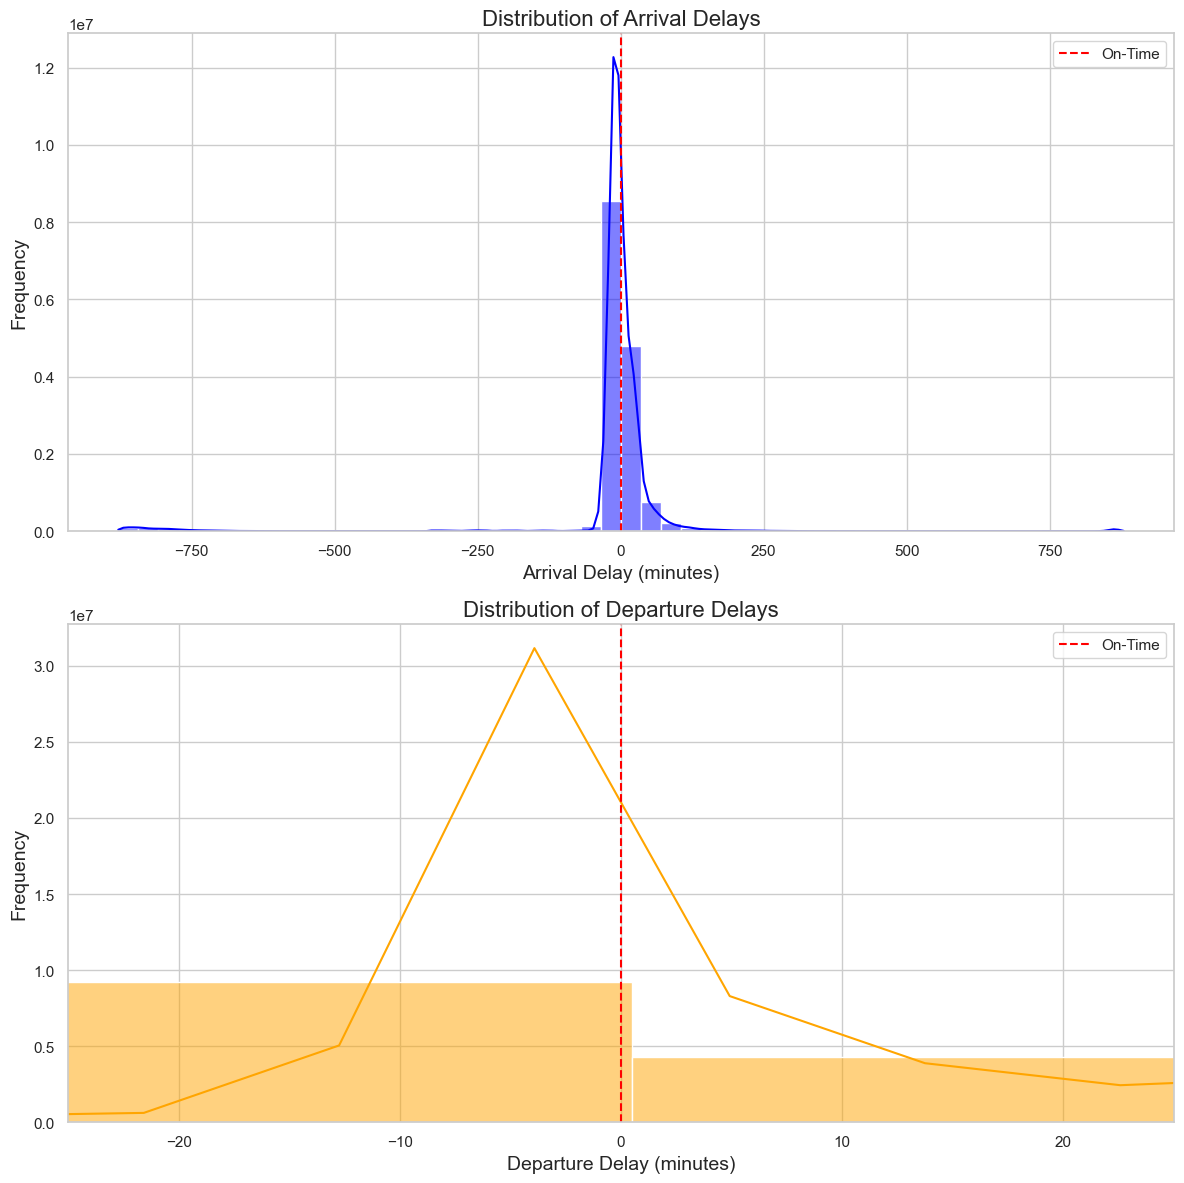

In [110]:

# Set the plot style
sns.set(style='whitegrid')

# Create subplots for arrival and departure delays
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plotting Arrival Delays
sns.histplot(combined_data['arrival_delay'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Arrival Delays', fontsize=16)
axes[0].set_xlabel('Arrival Delay (minutes)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].axvline(x=0, color='red', linestyle='--', label='On-Time')
# Set the limits for the x-axis
plt.xlim(-25, 25)  # Adjust based on the distribution
axes[0].legend()

# Plotting Departure Delays
sns.histplot(combined_data['departure_delay'], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Departure Delays', fontsize=16)
axes[1].set_xlabel('Departure Delay (minutes)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].axvline(x=0, color='red', linestyle='--', label='On-Time')
# Set the limits for the x-axis
plt.xlim(-25, 25)  # Adjust based on the distribution
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [111]:
# Remove columns that contain only NaN values
combined_data = combined_data.dropna(axis=1, how='all')



In [112]:
print(combined_data.columns)
print(combined_data.shape)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'total_delay_time', 'is_weekend', 'arrival_delay', 'departure_delay'],
      dtype='object')
(15094416, 56)


In [118]:
# Create a dictionary to track unique columns
unique_columns = {}
for col in combined_data.columns:
    if col not in unique_columns:
        unique_columns[col] = combined_data[col]

# Create a new DataFrame from the unique columns
combined_data = pd.DataFrame(unique_columns)

In [125]:
# Remove duplicate columns by keeping the first occurrence
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]


In [127]:
print(combined_data.columns)
print(combined_data.shape)

Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'total_delay_time', 'is_weekend', 'arrival_delay', 'departure_delay'],
      dtype='object')
(15094416, 56)


In [129]:
print(combined_data.dtypes)

day_of_week                    int64
date                          object
op_unique_carrier             object
tail_num                      object
op_carrier_fl_num              int64
origin_iata                   object
origin_city                   object
dest_iata                     object
dest_city                     object
crs_dep_time                   int64
dep_time                     float64
taxi_out                     float64
wheels_off                   float64
wheels_on                    float64
taxi_in                      float64
crs_arr_time                   int64
arr_time                     float64
cancelled                    float64
diverted                     float64
crs_elapsed_time             float64
actual_elapsed_time          float64
air_time                     float64
flights                      float64
distance                     float64
distance_group                 int64
carrier_delay                float64
weather_delay                float64
n

In [135]:
print(combined_data.describe())

        day_of_week  op_carrier_fl_num  crs_dep_time      dep_time  \
count  1.509442e+07       1.509442e+07  1.509442e+07  1.509442e+07   
mean   3.979390e+00       2.328787e+03  5.116274e+02  5.133592e+02   
std    2.005736e+00       1.530734e+03  1.807505e+02  1.847890e+02   
min    1.000000e+00       1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.000000e+00       1.120000e+03  3.600000e+02  3.620000e+02   
50%    4.000000e+00       2.085000e+03  5.050000e+02  5.040000e+02   
75%    6.000000e+00       3.312000e+03  6.670000e+02  6.700000e+02   
max    7.000000e+00       8.819000e+03  8.790000e+02  8.800000e+02   

           taxi_out    wheels_off     wheels_on       taxi_in  crs_arr_time  \
count  1.509442e+07  1.509442e+07  1.509442e+07  1.509442e+07  1.509442e+07   
mean   1.720399e+01  1.373624e+03  1.467875e+03  7.980339e+00  5.676778e+02   
std    9.007818e+00  5.135616e+02  5.477040e+02  6.408931e+00  1.911144e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.00

In [132]:
# View all duplicate rows
duplicate_rows = combined_data[combined_data.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [day_of_week, date, op_unique_carrier, tail_num, op_carrier_fl_num, origin_iata, origin_city, dest_iata, dest_city, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, distance_group, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_state, dest_state, origin_latitude, origin_longitude, dest_latitude, dest_longitude, airport_ref, type_of_airport, airport_name, elevation_ft, scheduled_service, unique_id, id, length_ft, width_ft, surface, lighted, closed, le_ident, le_displaced_threshold_ft, he_ident, he_displaced_threshold_ft, total_delay_time, is_weekend, arrival_delay, departure_delay]
Index: []

[0 rows x 56 columns]


In [137]:
# # Identify which iata codes have the most variability in latitude and longitude.

# # Check the columns in duplicate_rows
# print(duplicate_rows.columns)

# # Ensure 'latitude' and 'longitude' are present
# if 'latitude' in duplicate_rows.columns and 'longitude' in duplicate_rows.columns:
#     # Group by IATA code and count unique latitude and longitude values
#     lat_lon_variability = duplicate_rows.groupby('origin_iata').agg({
#         'latitude': 'nunique',
#         'longitude': 'nunique'
#     }).reset_index()

#     # Rename columns for clarity
#     lat_lon_variability.columns = ['iata', 'unique_latitudes', 'unique_longitudes']

#     # Filter for IATA codes with more than one unique latitude or longitude
#     variability_filter = lat_lon_variability[(lat_lon_variability['unique_latitudes'] > 1) | 
#                                              (lat_lon_variability['unique_longitudes'] > 1)]

#     print("IATA codes with variability in latitude or longitude:")
#     print(variability_filter)
# else:
#     print("Columns 'latitude' or 'longitude' do not exist in the DataFrame.")


In [139]:
# # Create plots to visualize how tmax, tmin, and prcp vary over the dates for the same iata code.

# # Ensure 'date' is in datetime format
# duplicate_rows.loc[:, 'date'] = pd.to_datetime(duplicate_rows['date'])

# # Plot Max Temperature (tmax)
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=duplicate_rows, x='date', y='tmax', hue='origin_iata', marker='o')
# plt.title('Max Temperature Over Time for Duplicate Entries')
# plt.xlabel('Date')
# plt.ylabel('Max Temperature (°F)')
# plt.xticks(rotation=45)
# plt.legend(title='IATA Code')
# plt.tight_layout()
# plt.show()



In [141]:

# # Plot Min Temperature (tmin)
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=duplicate_rows, x='date', y='tmin', hue='origin_iata', marker='o')
# plt.title('Min Temperature Over Time for Duplicate Entries')
# plt.xlabel('Date')
# plt.ylabel('Min Temperature (°F)')
# plt.xticks(rotation=45)
# plt.legend(title='IATA Code')
# plt.tight_layout()
# plt.show()

# # Plot Precipitation (prcp)
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=duplicate_rows, x='date', y='prcp', hue='origin_iata', marker='o')
# plt.title('Precipitation Over Time for Duplicate Entries')
# plt.xlabel('Date')
# plt.ylabel('Precipitation (inches)')
# plt.xticks(rotation=45)
# plt.legend(title='IATA Code')
# plt.tight_layout()
# plt.show()


In [143]:
# # Ensure that each iata code consistently points to the same airport name, latitude, longitude, and elevation.
# consistency_check = duplicate_rows.groupby('iata')[['latitude', 'longitude', 'elevation']].nunique()
# print(consistency_check)


In [145]:
# Handle Missing Values: fill or drop missing values (e.g., mean, median, mode, or dropping rows/columns)

# Drop duplicate rows, keeping the first occurrence
combined_data_cleaned = combined_data.drop_duplicates(keep='first')

# Reset the index after dropping duplicates
combined_data_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(combined_data_cleaned.head())

   day_of_week        date op_unique_carrier tail_num  op_carrier_fl_num  \
0            1  2023-05-01                9e   n131ev               4888   
1            1  2023-05-01                9e   n131ev               4888   
2            1  2023-05-01                9e   n131ev               4888   
3            1  2023-05-01                9e   n131ev               4888   
4            1  2023-05-01                9e   n131ev               5128   

  origin_iata origin_city dest_iata    dest_city  crs_dep_time  ...  lighted  \
0         cvg  cincinnati       msp  minneapolis           474  ...        1   
1         cvg  cincinnati       msp  minneapolis           474  ...        1   
2         cvg  cincinnati       msp  minneapolis           474  ...        1   
3         cvg  cincinnati       msp  minneapolis           474  ...        1   
4         dsm  des moines       msp  minneapolis           670  ...        1   

   closed  le_ident  le_displaced_threshold_ft  he_ident  \
0 

In [147]:
print(combined_data_cleaned.memory_usage(deep=True).sum())


17602743548


In [148]:
# Downcast numeric columns
for col in combined_data_cleaned.select_dtypes(include=['float']):
    combined_data_cleaned[col] = pd.to_numeric(combined_data_cleaned[col], downcast='float')

for col in combined_data_cleaned.select_dtypes(include=['int']):
    combined_data_cleaned[col] = pd.to_numeric(combined_data_cleaned[col], downcast='integer')

# Convert object types to category if applicable
for col in combined_data_cleaned.select_dtypes(include=['object']):
    if combined_data_cleaned[col].nunique() / len(combined_data_cleaned) < 0.5:  # If less than 50% unique values
        combined_data_cleaned[col] = combined_data_cleaned[col].astype('category')


In [155]:
import pandas as pd

chunk_size = 100000  # Adjust as needed
duplicates_count = 0

# Corrected file path string
file_path = r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v2.csv'

# Read CSV in chunks and count duplicates
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    duplicates_count += chunk.duplicated(keep=False).sum()

print("Number of duplicates:", duplicates_count)


Number of duplicates: 0


Investigating missing values

In [ ]:
# flight_data
# High missing values for carrier_delay, weather_delay, nas_delay, 
# security_delay, and late_aircraft_delay, but we are keeping 
# due to nature of information.
# Moderate Missing Values: tail_num, dep_time, taxi_out, etc.: 
# These have around 1-3% missing values. Filling these with 
# the mean or median, as they are likely to still provide valuable 
# information.

In [157]:
# Calculate the percentage of null values for each column
null_percentage_flights = combined_data_cleaned.isnull().mean() * 100

# Filter to show only columns with null values
null_percentage_flights = null_percentage_flights[null_percentage_flights > 0]

# Display the result
print(null_percentage_flights)

carrier_delay                79.304943
weather_delay                79.304943
nas_delay                    79.304943
security_delay               79.304943
late_aircraft_delay          79.304943
le_displaced_threshold_ft    90.087513
he_displaced_threshold_ft    90.567452
dtype: float64


In [158]:
# Look at how these delays correlate with each other
correlation_matrix = combined_data_cleaned[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].corr()
print(correlation_matrix)


                     carrier_delay  weather_delay  nas_delay  security_delay  \
carrier_delay             1.000000      -0.038092  -0.079220       -0.013052   
weather_delay            -0.038092       1.000000  -0.001684       -0.005749   
nas_delay                -0.079220      -0.001684   1.000000       -0.008277   
security_delay           -0.013052      -0.005749  -0.008277        1.000000   
late_aircraft_delay      -0.036657      -0.012014  -0.094992       -0.009661   

                     late_aircraft_delay  
carrier_delay                  -0.036657  
weather_delay                  -0.012014  
nas_delay                      -0.094992  
security_delay                 -0.009661  
late_aircraft_delay             1.000000  


Since the correlations are low, it implies that these types of delays do not influence each other significantly. For instance, an increase in carrier_delay does not correlate with an increase or decrease in weather_delay, nas_delay, etc.

Investigate Further: 

Time of year (seasonality)
Day of the week
Specific routes or airlines
Visual Analysis: Visualizing these relationships can also provide insights:

Scatter plots could help visualize the relationship between two delay types, even if correlations are low.
Boxplots can show the distribution of delays.

In [163]:
print(combined_data_cleaned.columns)


Index(['day_of_week', 'date', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_iata', 'origin_city', 'dest_iata',
       'dest_city', 'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'origin_state', 'dest_state', 'origin_latitude', 'origin_longitude',
       'dest_latitude', 'dest_longitude', 'airport_ref', 'type_of_airport',
       'airport_name', 'elevation_ft', 'scheduled_service', 'unique_id', 'id',
       'length_ft', 'width_ft', 'surface', 'lighted', 'closed', 'le_ident',
       'le_displaced_threshold_ft', 'he_ident', 'he_displaced_threshold_ft',
       'total_delay_time', 'is_weekend', 'arrival_delay', 'departure_delay'],
      dtype='object')


In [165]:
# Check unique airports reporting any delays
delay_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
airports_with_delays = combined_data_cleaned[delay_columns].notnull().any(axis=1)
unique_airports = combined_data_cleaned[airports_with_delays]['origin_iata'].unique() #origin airport
print(f"Unique airports reporting delays: {len(unique_airports)}")
print(unique_airports)


Unique airports reporting delays: 267
['ind', 'myr', 'cho', 'sgf', 'atl', ..., 'dlg', 'bih', 'cod', 'cys', 'stc']
Length: 267
Categories (268, object): ['abi', 'abr', 'ack', 'act', ..., 'vps', 'wrg', 'wys', 'xna']


In [171]:
# Summarize null value counts for each delay type
null_summary = combined_data_cleaned[delay_columns].isnull().sum()
print(null_summary)

# Group by the correct airport column and calculate the percentage of null values
null_percentage_by_airport = combined_data_cleaned.groupby('origin_iata')[delay_columns].apply(lambda x: x.isnull().mean())
print(null_percentage_by_airport)


carrier_delay          11970618
weather_delay          11970618
nas_delay              11970618
security_delay         11970618
late_aircraft_delay    11970618
dtype: int64


C:\Users\hopeh\AppData\Local\Temp\ipykernel_12864\1353452198.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  null_percentage_by_airport = combined_data_cleaned.groupby('origin_iata')[delay_columns].apply(lambda x: x.isnull().mean())


             carrier_delay  weather_delay  nas_delay  security_delay  \
origin_iata                                                            
abi               0.844066       0.844066   0.844066        0.844066   
abr               0.917582       0.917582   0.917582        0.917582   
ack               0.741955       0.741955   0.741955        0.741955   
act               0.796673       0.796673   0.796673        0.796673   
acv               0.777512       0.777512   0.777512        0.777512   
...                    ...            ...        ...             ...   
vld               0.898907       0.898907   0.898907        0.898907   
vps               0.829574       0.829574   0.829574        0.829574   
wrg               0.845730       0.845730   0.845730        0.845730   
wys               0.925170       0.925170   0.925170        0.925170   
xna               0.822886       0.822886   0.822886        0.822886   

             late_aircraft_delay  
origin_iata                 

Summary of Null Values:

Each delay type has a total of 3,211,353 null values, which indicates that these delays are missing for a large portion of the dataset.

Percentage of Null Values by Airport:

The percentages for each delay type across various airports (identified by origin_iata) are consistent. This means that for each airport, the proportion of missing values for the delay types is very similar.

The consistent high percentage of null values for all delay types across different airports suggests a few possibilities:

Data Reporting Issues:

It’s possible that the dataset does not consistently report certain types of delays. If many flights are missing delay data, it could be that those types of delays are not applicable or not recorded for some flights.
Flight Types:

Certain types of flights (e.g., regional vs. international, or different airlines) may not report delay reasons uniformly. If a significant number of flights are not delayed for reasons recorded in these columns, the null values would be high.
Consistent Data Collection Methods:

If the data collection methods are consistent across all airports, this could also lead to similar null value patterns.

In [174]:
airline_mapping = {
    '9e': 'Envoy Air',
    'aa': 'American Airlines',
    'as': 'Alaska Airlines',
    'b6': 'JetBlue Airways',
    'dl': 'Delta Air Lines',
    'f9': 'Frontier Airlines',
    'g4': 'Allegiant Air',
    'ha': 'Hawaiian Airlines',
    'mq': 'Envoy Air',
    'nk': 'Spirit Airlines',
    'oh': 'Piedmont Airlines',
    'oo': 'SkyWest Airlines',
    'ua': 'United Airlines',
    'wn': 'Southwest Airlines',
    'yx': 'Republic Airways'
}


In [180]:
# Create a function to map codes to airport names
def map_airline_codes(codes):
    return airline_mapping.get(codes, 'Unknown Airline')

# apply function
combined_data_cleaned['airline_name'] = combined_data_cleaned['op_unique_carrier'].apply(map_airline_codes)

# View the updated DataFrame
print(combined_data_cleaned[['op_unique_carrier', 'airline_name']].head())



  op_unique_carrier airline_name
0                9e    Envoy Air
1                9e    Envoy Air
2                9e    Envoy Air
3                9e    Envoy Air
4                9e    Envoy Air


In [182]:
# Group by airline, origin, and destination to count missing data
missing_data_routes = combined_data_cleaned[combined_data_cleaned[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()

# Print the result
print(missing_data_routes)

C:\Users\hopeh\AppData\Local\Temp\ipykernel_12864\253639609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_data_routes = combined_data_cleaned[combined_data_cleaned[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()


airline_name     origin_iata  dest_iata
Alaska Airlines  abi          abe          0
                              abi          0
                              abq          0
                              aby          0
                              ack          0
                                          ..
United Airlines  xna          wys          0
                              xna          0
                              xwa          0
                              yak          0
                              yum          0
Length: 1121848, dtype: int64


In [184]:
# Sort results
missing_data_routes_sorted = missing_data_routes.sort_values(ascending=False)
print(missing_data_routes_sorted)

airline_name        origin_iata  dest_iata
American Airlines   dfw          lax          24507
                                 phx          21287
                                 ord          20503
Southwest Airlines  den          phx          20154
American Airlines   dfw          sat          19824
                                              ...  
Envoy Air           ome          mei              0
                                 mem              0
                                 mfe              0
                                 mfr              0
United Airlines     xna          yum              0
Length: 1121848, dtype: int64


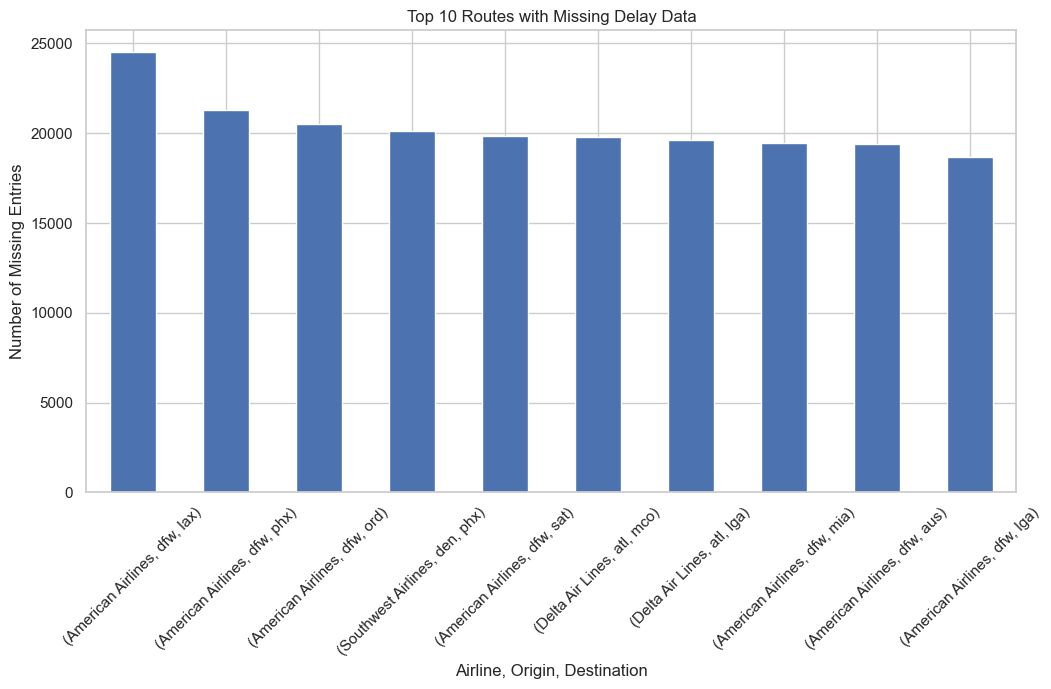

In [186]:
missing_data_routes_sorted.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Routes with Missing Delay Data')
plt.xlabel('Airline, Origin, Destination')
plt.ylabel('Number of Missing Entries')
plt.xticks(rotation=45)
plt.show()

In [211]:
print(type(missing_data_routes_sorted))



<class 'pandas.core.series.Series'>


In [249]:
missing_data_routes_sorted_df = missing_data_routes_sorted.to_frame(name='value')  # Name the Series


# Save to CSV 
# Assuming missing_data_routes_sorted_df is your DataFrame
missing_data_routes_sorted_df.to_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\missing_data_routes_sorted_df.csv", index=False)


# Load dataset
# Read the CSV file back into a DataFrame
missing_data_routes_sorted_df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\missing_data_routes_sorted_df.csv")


In [ ]:
missing_data_routes_sorted_df.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Delay Data by Airline')
plt.xlabel('Airlines')
plt.ylabel('Number of Missing Entries')
plt.xticks(rotation=45)
plt.show()

Summary of Missing Delay Data by Airline

United Airlines (ua) and Southwest Airlines (wn) have the highest counts of missing delay data, with 339,040 and 638,415 entries missing, respectively.
American Airlines (aa) and Delta Airlines (dl) also show significant numbers of missing data, with 492,133 and 478,777 entries missing.
Other airlines like Alaska Airlines (as) and JetBlue Airways (b6) have comparatively fewer missing entries.

Possible Implications:

Airline Reporting Practices:
Airlines with a high number of missing delay entries may have different reporting practices or may be less consistent in reporting specific delay reasons.

Flight Type Differences:
The airlines with fewer missing entries may have flight routes or operational practices that more consistently record delays.

Potential Data Gaps:
A large number of missing values could indicate that certain flights or routes (especially those operated by the airlines with high missing data) may have delays that are not being reported for some reason.



In [ ]:
# investigate if there are specific routes or types of flights associated with these airlines that might also show a pattern in the missing data.

In [ ]:
missing_data_routes = flights_data[flights_data[delay_columns].isnull().any(axis=1)].groupby(['airline_name', 'origin_iata', 'dest_iata']).size()
print(missing_data_routes)

In [ ]:
# Aggregate missing data by airline and route
missing_data_summary = missing_data_routes.reset_index(name='missing_count')

# Sort by missing count to find the most affected routes
missing_data_summary = missing_data_summary.sort_values(by='missing_count', ascending=False)

# Display the top routes with missing data
print(missing_data_summary.head(20))

weather_data
High Missing Values: snow (64.83%) and snwd (67.21%): Since these 
represent snow-related data, they are considered critical to analysis.
tobs (94.10%): This column has very high missing values, but we are
leaving for now because it represents temperatures observed.
Moderate Missing Values: elevation, prcp, tmax, tmin:
These have around 4-5% missing values. Filling these with the mean or median.


In [ ]:
# Identify whether there are specific routes consistently showing
# missing data and see if they correlate with certain characteristics 
# (like flight frequency, carrier performance, etc.).
# Plot top 10 routes with missing data
plt.figure(figsize=(12, 6))
sns.barplot(data=missing_data_summary.head(10), 
            x='missing_count', 
            y='origin_iata', 
            hue='airline_name')
plt.title('Top 10 Routes with Missing Delay Data by Airline')
plt.xlabel('Count of Missing Data')
plt.ylabel('Origin IATA')
plt.legend(title='Airline Name')
plt.show()

In [ ]:
# Group by airline and calculate total missing data
airline_missing_counts = missing_data_summary.groupby('airline_name')['missing_count'].sum().reset_index()

# Sort and visualize airline performance regarding missing data
plt.figure(figsize=(12, 6))
sns.barplot(data=airline_missing_counts.sort_values(by='missing_count', ascending=False), 
            x='missing_count', 
            y='airline_name')
plt.title('Total Missing Delay Data by Airline')
plt.xlabel('Total Missing Count')
plt.ylabel('Airline Name')
plt.show()


In [ ]:
# Investigate correlations between the missing data and other features, 
# like flight distance or time of year. 

# Merge missing data with other relevant features if available
merged_missing_data = flights_data.merge(missing_data_summary, 
                                          on=['airline_name', 'origin_iata', 'dest_iata'], 
                                          how='left')

# Analyze correlation with flight distance, for instance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_missing_data, 
                x='distance', 
                y='missing_count')
plt.title('Missing Data Count vs. Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Count of Missing Data')
plt.show()


In [ ]:
# Calculate correlation
correlation = merged_missing_data['missing_count'].corr(merged_missing_data['distance'])

print(f'Correlation between missing data count and flight distance: {correlation}')


In [ ]:
weather_data.columns

Dive deeper into the specific characteristics of the flights that are missing data, such as:

Flight times: Are these flights mostly at specific times of day?
Days of the week: Are there certain days that show higher rates of missing data?
Airline performance: How do these routes compare to others in terms of delays and cancellations?
This analysis will help you determine whether specific airlines or routes are associated with the missing data and identify any patterns that could inform further investigation or operational improvements.

In [ ]:
# Compare data for tmax, tmin, and tobs in weather_data

# Check how many records exist for tmax, tmin, and 
# tobs and their missing values.
print(weather_data[['tmax', 'tmin', 'tobs']].isnull().sum())

# Count non-missing records
non_missing_counts = weather_data[['tmax', 'tmin', 'tobs']].count()
print(non_missing_counts)

In [ ]:
# Identify Stations Reporting Patterns

# Group by station (iata) and count reports
station_counts = weather_data.groupby('iata')[['tmax', 'tmin', 'tobs']].count()
print(station_counts)


In [ ]:
only_tmax_tmin = station_counts[station_counts['tobs'] == 0]
print(f"Stations reporting only tmax and tmin: {only_tmax_tmin.shape[0]}")

In [ ]:
only_tobs = station_counts[station_counts[['tmax', 'tmin']].isnull().any(axis=1)]
print(f"Stations reporting only tobs: {only_tobs.shape[0]}")


In [ ]:
# Analyze recording patterns
def recording_pattern(row):
    if pd.notnull(row['tmax']) and pd.notnull(row['tmin']) and pd.isnull(row['tobs']):
        return 'tmax_tmin_only'
    elif pd.isnull(row['tmax']) and pd.isnull(row['tmin']) and pd.notnull(row['tobs']):
        return 'tobs_only'
    elif pd.notnull(row['tmax']) and pd.notnull(row['tmin']) and pd.notnull(row['tobs']):
        return 'all_recorded'
    else:
        return 'other'

weather_data['recording_pattern'] = weather_data[['tmax', 'tmin', 'tobs']].apply(recording_pattern, axis=1)


In [ ]:

# count recording patterns
pattern_counts = weather_data['recording_pattern'].value_counts()
print(pattern_counts)


In [ ]:
#  bar chart to visualize the distribution of recording patterns

pattern_counts.plot(kind='bar', color='skyblue')
plt.title('Recording Patterns of Weather Stations')
plt.xlabel('Recording Pattern')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.boxplot(data=weather_data[weather_data['recording_pattern'] != 'tobs_only'], x='recording_pattern', y='tmax')
plt.title('Comparison of tmax Across Recording Patterns')
plt.show()

sns.boxplot(data=weather_data[weather_data['recording_pattern'] != 'tobs_only'], x='recording_pattern', y='tmin')
plt.title('Comparison of tmin Across Recording Patterns')
plt.show()


In [ ]:
# Drop tobs column
weather_data.drop(columns=['tobs'], inplace=True)
print(weather_data.head())

In [ ]:
# Standardize column names
flights_data.columns = flights_data.columns.str.lower().str.replace(' ', '_')
weather_data.columns = weather_data.columns.str.lower().str.replace(' ', '_')


In [ ]:
# Check how many records exist and their missing values.
print(weather_data.isnull().sum())

# Count non-missing records
non_missing_counts = weather_data.count()
print(non_missing_counts)

In [ ]:
# Check how many records exist and their missing values.
print(flights_data.isnull().sum())

# Count non-missing records
non_missing_counts = flights_data.count()
print(non_missing_counts)

In [ ]:
print(flights_data.head())

In [ ]:
print(weather_data.head())

In [ ]:
# Mapping dictionary
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Convert numeric days to day names
flights_data['day_of_week'] = flights_data['day_of_week'].replace(day_mapping)

# Display the updated DataFrame
print(flights_data.head(3))

In [ ]:
# Flight Delays: Analyze the distribution of flight delays.
sns.histplot(flights_data['actual_elapsed_time'] - flights_data['crs_elapsed_time'], bins=50)
plt.title('Distribution of Flight Delays')

# Set the limits for the x-axis
plt.xlim(-100, 100)  # Adjust based on the distribution

plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Weather Variables: Analyze temperature and precipitation.

sns.boxplot(x='tmax', data=weather_data)
plt.title('Max Temperature Distribution')
plt.show()

sns.boxplot(x='prcp', data=weather_data)
plt.title('Precipitation Distribution')
plt.show()


In [ ]:
# Correlation between delays and weather:
combined_data = flights_data.merge(weather_data, left_on=['date', 'origin_iata'], right_on=['date', 'iata'], how='left')

# Calculate the delay
combined_data['delay'] = combined_data['actual_elapsed_time'] - combined_data['crs_elapsed_time'] 

# Create the scatterplot
sns.scatterplot(x='tmax', y='delay', data=combined_data)
plt.title('Flight Delay vs Max Temperature')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Delay (minutes)')
plt.show()




In [ ]:
# Merge for flight data for origin
origin_data = flights_data.merge(
    weather_data,
    left_on=['date', 'origin_iata'],
    right_on=['date', 'iata'],
    how='left',
    suffixes=('', '_origin')
)

# Merge for flight data for destination
dest_data = flights_data.merge(
    weather_data,
    left_on=['date', 'dest_iata'],
    right_on=['date', 'iata'],
    how='left',
    suffixes=('', '_dest')
)

In [ ]:
# Correlation between delays and weather:
combined_data = flights_data.merge(weather_data, left_on=['date', 'dest_iata'], right_on=['date', 'iata'], how='left')

# Calculate the delay
combined_data['delay'] = combined_data['actual_elapsed_time'] - combined_data['crs_elapsed_time'] 

# Create the scatterplot
sns.scatterplot(x='tmax', y='delay', data=combined_data)
plt.title('Flight Delay vs Max Temperature')
plt.xlabel('Max Temperature (°F)')
plt.ylabel('Delay (minutes)')
plt.show()

In [ ]:
origin_data.columns

In [ ]:
dest_data.columns

In [ ]:

# can't merge dest_data and arrival_data due to memory errors
# Function to process and merge data for a range of dates


In [ ]:
# Print common columns between origin_data and dest_data
common_columns = set(origin_data.columns) & set(dest_data.columns)
print(common_columns)

In [ ]:
print(origin_data.duplicated().sum())
print(dest_data.duplicated().sum())

In [ ]:
print(origin_data.columns)
print(origin_data.shape)

In [ ]:
print(dest_data.columns)
print(dest_data.shape)

In [ ]:
# Identify duplicate columns

# Create a function to identify columns with identical content
def get_duplicate_columns(df1, df2):
    duplicates = []
    for col1 in df1.columns:
        for col2 in df2.columns:
            if df1[col1].equals(df2[col2]):
                duplicates.append((col1, col2))
    return duplicates

# Get the list of duplicate columns
duplicate_columns = get_duplicate_columns(origin_data, dest_data)

# Step 2: Print duplicate columns for verification
print("Duplicate columns based on content:")
for orig_col, dest_col in duplicate_columns:
    print(f"Origin Column: {orig_col} | Destination Column: {dest_col}")


In [ ]:
# Calculate delay for origin data
origin_data['delay'] = origin_data['actual_elapsed_time'] - origin_data['crs_elapsed_time']

# Keep only necessary columns: 'date', 'iata', and 'delay'
origin_delay = origin_data[['date', 'iata', 'delay']]

print(origin_delay)


In [ ]:

# Calculate delay for destination data
combined_data_cleaned['delay_dest'] = combined_data_cleaned['actual_elapsed_time_dest'] - combined_data_cleaned['crs_elapsed_time_dest']

# Keep only necessary columns: 'date', 'iata', and 'delay'
dest_delay = dest_data[['date', 'iata', 'delay_dest']]


In [ ]:
print(dest_delay)


In [ ]:
print(f"Length of origin_delay: {len(origin_data['delay'])}")
print(f"Length of dest_delay: {len(dest_data['delay'])}")


In [ ]:
# Assuming origin_delay and dest_delay are Series with corresponding indexes
# Create a DataFrame with both delays
delay_data = pd.DataFrame({
    'origin_delay': origin_delay,
    'dest_delay': dest_delay
})

# Now filter the rows where the delays are not equal
mismatched_delays = delay_data[delay_data['origin_delay'] != delay_data['dest_delay']]

# Display the mismatched rows
print(mismatched_delays)


In [ ]:
print(flights_data.columns)
print(flights_data.shape)

In [ ]:
print(weather_data.columns)
print(weather_data.shape)

In [ ]:
# Specify the columns to check for null values
columns_to_fill = ['prcp', 'tmax', 'tmin', 'elevation']

# Fill missing values with the median for each specified column
for col in columns_to_fill:
    median_value = weather_data[col].median()
    weather_data[col] = weather_data[col].fillna(median_value)

# Interpolate remaining null values (if any)
weather_data[columns_to_fill] = weather_data[columns_to_fill].interpolate()

# Print the count of null values in the specified columns
null_counts = weather_data[columns_to_fill].isnull().sum()

print("Null values in specified columns:")
print(null_counts)


In [ ]:
weather_data.isnull().sum()

Missing Data in weather_data: If weather_data does not have entries for specific dates and corresponding iata codes, any flight from flights_data that matches those criteria will not find a match, leading to NaN values.

In [ ]:
nan_rows = combined_data.isnull()
print(nan_rows)


In [ ]:
print(flights_data['origin_iata'].unique())
print(weather_data['iata'].unique())
print(flights_data.shape)
print(weather_data.shape)


It seems there are iata codes in weather_data that do not match the origin_iata codes in flights_data. For instance, if flights_data has 'cvg' as origin_iata but weather_data does not have an entry for 'cvg' on that date, the merge will result in NaN for the iata column in the combined_data for those flights. The shapes indicate that flights_data has significantly more rows (4,009,949) than weather_data (139,012). This implies that many flights may not have corresponding weather data.

In [ ]:
nan_rows = combined_data[combined_data['iata'].isnull()]
print(nan_rows[['date', 'origin_iata','dest_iata']])


In [ ]:
# Select the specific columns to view
columns_of_interest = ['iata', 'origin_iata', 'dest_iata']
selected_data = combined_data[columns_of_interest]

# Display the selected columns
print(selected_data)

In [ ]:
unmatched_iata = set(flights_data['origin_iata'].unique()) - set(weather_data['iata'].unique())
print(unmatched_iata)

In [ ]:
missing_dates = set(flights_data['date']) - set(weather_data['date'])
print(missing_dates)

In [ ]:
combined_data.head()

In [ ]:
# Specify the columns to remove
columns_to_remove = ['iata', 'recording_pattern', 'latitude', 'longitude']

# Create a new DataFrame without the specified columns
cleaned_combined_data = combined_data.drop(columns=columns_to_remove)

# Optionally, check the first few rows of the new DataFrame
print(cleaned_combined_data.head())

In [ ]:
cleaned_combined_data.columns

In [ ]:
# Save the DataFrame to a CSV file
file_path = r'C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\cleaned_combined_data_v3.csv'

cleaned_combined_data.to_csv(file_path, index=False)

print(f"Data saved to {file_path}")


In [ ]:
print(cleaned_combined_data.columns)

In [ ]:
cleaned_combined_data.shape

In [ ]:
# Rename to flights_weather_df
flights_weather_df = cleaned_combined_data

In [ ]:
# Delays by days of week
# Calculate the delay
flights_weather_df['delay'] = flights_weather_df['actual_elapsed_time'] - flights_weather_df['crs_elapsed_time']

# Delays by days of week
sns.boxplot(x='day_of_week', y='delay', data=flights_weather_df)
plt.title('Flight Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay (minutes)')
plt.show()


In [ ]:
# Select only numeric columns for correlation
numeric_data = flights_weather_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()

# Heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Flight delays by state


# Flight delays by state
avg_delay_by_state = flights_weather_df.groupby('origin_state')['delay'].mean().reset_index()

# Create the bar plot
sns.barplot(x='origin_state', y='delay', data=avg_delay_by_state)
plt.title('Average Flight Delay by State')
plt.xticks(rotation=45)
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Origin State')
plt.show()



In [ ]:
# # Flight delays by latitudes and longitudes

# flights_data['date'] = pd.to_datetime(flights_data['date'])

# # Create a season column
# def get_season(month):
#     if month in [12, 1, 2]:
#         return 'Winter'
#     elif month in [3, 4, 5]:
#         return 'Spring'
#     elif month in [6, 7, 8]:
#         return 'Summer'
#     else:
#         return 'Fall'

# flights_data['season'] = flights_data['date'].dt.month.apply(get_season)

# # Combine relevant data
# data_for_correlation = flights_data[['latitude', 'longitude', 'arrival_delay', 'departure_delay', 'season']]

# # Correlation Analysis
# # Calculate correlation coefficients by season
# correlation_results = data_for_correlation.groupby('season').corr().reset_index()

# # Extracting the relevant correlation data
# arrival_corr = correlation_results[correlation_results['level_1'].isin(['arrival_delay', 'latitude', 'longitude'])]
# departure_corr = correlation_results[correlation_results['level_1'].isin(['departure_delay', 'latitude', 'longitude'])]

# # Visualization
# plt.figure(figsize=(14, 6))

# # Scatter plot for Arrival Delay vs Latitude
# plt.subplot(1, 2, 1)
# sns.scatterplot(data=flights_data, x='latitude', y='arrival_delay', hue='season', alpha=0.7)
# plt.title('Arrival Delay vs Latitude by Season')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Arrival Delay (minutes)')

# # Scatter plot for Departure Delay vs Latitude
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=flights_data, x='latitude', y='departure_delay', hue='season', alpha=0.7)
# plt.title('Departure Delay vs Latitude by Season')
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Latitude')
# plt.ylabel('Departure Delay (minutes)')

# plt.tight_layout()
# plt.show()

# # Print correlation coefficients
# # calculate correlations between delays and latitude/longitude. 
# # The results are grouped by season to see how the relationships change.
# print("Arrival Delay Correlation with Latitude:")
# print(arrival_corr)
# print("\nDeparture Delay Correlation with Latitude:")
# print(departure_corr)

Some seasonal correlations are slightly positive (e.g., Summer Arrival Delay: 0.042, Winter Departure Delay: 0.009668), but these values are still weak.

Similar to latitude, longitude also shows low correlation with delays. Most values are close to zero, indicating no significant relationship.

Explore other factors that might impact delays, such as weather conditions (precipitation, snow), airport traffic, or operational factors (e.g., carrier delays).

Consider using statistical models (like linear regression) to analyze the influence of various factors, including latitude, longitude, and weather, on flight delays.

In [ ]:
# Assuming 'date' is in your DataFrame and is in string format
flights_weather_df['date'] = pd.to_datetime(flights_weather_df['date'])

# Define a function to get the season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

# Apply the function to create the season column
flights_weather_df['season'] = flights_weather_df['date'].apply(get_season)

# Now sample the data again
sampled_data = flights_weather_df.sample(frac=0.1, random_state=1)

# Scatter plot for Arrival Delay vs Latitude (using sampled data)
plt.subplot(1, 2, 1)
sns.scatterplot(data=sampled_data, x='dest_latitude', y='arrival_delay', hue='season', alpha=0.7)
plt.title('Arrival Delay vs Latitude by Season (Sampled)')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Latitude')
plt.ylabel('Arrival Delay (minutes)')

# Remove legend
plt.legend([], [], frameon=False)

# Scatter plot for Departure Delay vs Latitude (using sampled data)
plt.subplot(1, 2, 2)
sns.scatterplot(data=sampled_data, x='origin_latitude', y='departure_delay', hue='season', alpha=0.7)
plt.title('Departure Delay vs Latitude by Season (Sampled)')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Latitude')
plt.ylabel('Departure Delay (minutes)')

# Remove legend
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

In [ ]:
# Drop non-numeric columns that aren't needed for correlation
flights_weather_df_numeric = flights_weather_df.select_dtypes(include=[np.number])


In [ ]:
correlation_matrix = flights_weather_df_numeric.corr()
print(correlation_matrix[['arrival_delay', 'departure_delay']])


Wheels On & Arrival Delay: The strongest correlation with arrival_delay is with wheels_on (0.276). This indicates that as the wheels-on time increases, arrival delays may also increase.
Departure Delay & Departure Time: There’s a notable positive correlation (0.245) between dep_time and departure_delay, suggesting that later departure times are associated with greater delays.
Arrival Delay and Departure Delay: There’s a moderate correlation (0.156) between arrival_delay and departure_delay, which is expected since delays often propagate through a flight schedule.
Weather Variables: The correlations with weather variables (prcp, snow, snwd, tmax, tmin) are quite low, indicating that weather may not have a significant impact on delays in this dataset.
Other Factors: Variables like crs_dep_time, crs_arr_time, and total_delay_time have negative correlations with delays, which might suggest timing discrepancies play a role.Visualize Relationships: Create scatter plots or pair plots to visualize relationships between key variables, especially those with stronger correlations. This can help identify any non-linear patterns or clusters.

Feature Engineering: Consider creating new features based on the existing ones. For example, you could create interaction terms between departure and arrival times, or consider categorizing times into "early," "on-time," and "late."

Modeling: If you're interested in predicting delays, consider building regression models using arrival_delay and departure_delay as your target variables. Use features with significant correlations as predictors.

Explore Seasonal Effects: Given that delays might vary by season, consider analyzing delays over time, or create a model that includes seasonal effects if you haven’t already.

Handle Missing Values: Check if any of the features with NaN values (like flights) might need imputation or removal from the analysis, as they can affect model performance.

Group Analysis: Consider grouping by other categorical variables like origin_state, dest_state, or carrier to see if certain airlines or routes consistently perform better or worse in terms of delays.

Evaluate Multicollinearity: Since some features might be correlated with each other, it may be worth investigating multicollinearity, especially if you proceed to modeling.

In [ ]:
flights_weather_df['season'] = flights_weather_df['date'].dt.month % 12 // 3 + 1
# Mapping months to seasons
season_mapping = {
    1: 'winter',
    2: 'spring',
    3: 'summer',
    4: 'fall'
}
flights_weather_df['season'] = flights_weather_df['season'].map(season_mapping)

In [ ]:
seasonal_delays = flights_weather_df.groupby('season')[['arrival_delay', 'departure_delay']].mean()
print(seasonal_delays)


Analysis of Seasonal Delays

Fall: Average arrival delay of about -12.40 minutes and a departure delay of about 2.84 minutes.
Spring: Average arrival delay of about -17.37 minutes, with a slightly higher departure delay.
Summer: The highest average arrival delay of about -24.16 minutes, but the departure delay is lower than in Spring.
Winter: Similar to Fall, with an average arrival delay of about -12.01 minutes and a higher departure delay than Fall.

In [ ]:
seasonal_delays.plot(kind='bar', figsize=(10, 6))
plt.title('Average Arrival and Departure Delays by Season')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')
plt.legend(title='Delay Type')
plt.show()

Compare the seasonal delays with other factors such as weather conditions or day of the week to identify any correlations.
Investigate if the delays are statistically significant between seasons using ANOVA or similar statistical tests.
Look into specific flights or routes that tend to have more significant delays in certain seasons.
Consider analyzing potential reasons for the delays, like weather conditions or operational issues during specific times.

In [ ]:
# # Print correlation coefficients
# # calculate correlations between delays and latitude/longitude. 
# # The results are grouped by season to see how the relationships change.


In [ ]:
flights_weather_df.columns

In [ ]:
# Scatter plots show the relationship between elevation and both arrival 
# and departure delays, colored by season. This helps visualize any patterns.

In [ ]:
# Function to plot delays vs elevation
def plot_delay_vs_elevation(data):
    plt.figure(figsize=(14, 6))

    # Arrival Delay
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x='elevation', y='arrival_delay', hue='season', alpha=0.7)
    plt.title('Arrival Delay vs Elevation by Season')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Elevation (feet)')
    plt.ylabel('Arrival Delay (minutes)')

    # Departure Delay
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='elevation', y='departure_delay', hue='season', alpha=0.7)
    plt.title('Departure Delay vs Elevation by Season')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Elevation (feet)')
    plt.ylabel('Departure Delay (minutes)')

    plt.tight_layout()
    plt.show()

# Call the plotting function with the correct DataFrame
plot_delay_vs_elevation(flights_weather_df)

# Calculate Correlation Coefficients
elevation_delay_corr = flights_weather_df.groupby('season')[['elevation', 'arrival_delay', 'departure_delay']].corr()
elevation_delay_corr = elevation_delay_corr.reset_index()

# Extracting relevant correlation data
arrival_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'arrival_delay']
departure_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'departure_delay']

# Print correlation coefficients
print("Arrival Delay Correlation with Elevation:")
print(arrival_elevation_corr[['season', 'elevation', 'arrival_delay', 'level_1']])
print("\nDeparture Delay Correlation with Elevation:")
print(departure_elevation_corr[['season', 'elevation', 'departure_delay', 'level_1']])


In [ ]:
# Flight delays vs elevation analysis
# Calculate Correlation Coefficients
# Function to plot delays vs elevation
def plot_delay_vs_elevation(data):
    plt.figure(figsize=(14, 6))

    # Arrival Delay
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x='elevation', y='arrival_delay', hue='season', alpha=0.7)
    plt.title('Arrival Delay vs Elevation by Season')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Elevation (feet)')
    plt.ylabel('Arrival Delay (minutes)')

    # Departure Delay
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data, x='elevation', y='departure_delay', hue='season', alpha=0.7)
    plt.title('Departure Delay vs Elevation by Season')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Elevation (feet)')
    plt.ylabel('Departure Delay (minutes)')

    plt.tight_layout()
    plt.show()

# Call the plotting function with the correct DataFrame
plot_delay_vs_elevation(flights_weather_df)

# Calculate Correlation Coefficients
elevation_delay_corr = flights_weather_df.groupby('season')[['elevation', 'arrival_delay', 'departure_delay']].corr()
elevation_delay_corr = elevation_delay_corr.reset_index()

# Extracting relevant correlation data
arrival_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'arrival_delay']
departure_elevation_corr = elevation_delay_corr[elevation_delay_corr['level_1'] == 'departure_delay']

# Print correlation coefficients
print("Arrival Delay Correlation with Elevation:")
print(arrival_elevation_corr[['season', 'elevation', 'arrival_delay', 'level_1']])
print("\nDeparture Delay Correlation with Elevation:")
print(departure_elevation_corr[['season', 'elevation', 'departure_delay', 'level_1']])


In [ ]:
# 
# Ensure 'date' column is in datetime format
flights_weather_df['date'] = pd.to_datetime(flights_weather_df['date'], errors='coerce')


In [ ]:

# Now, check if the columns exist and rename if necessary
# Extract relevant columns after merging
# Assuming the destination weather columns are suffixed with '_dest'

# Print columns
print("Columns in flights_weather_df:")
print(flights_weather_df.columns)

In [ ]:
# Identifying outliers

Q1 = flights_weather_df['total_delay_time'].quantile(0.25)
Q3 = flights_weather_df['total_delay_time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = flights_weather_df[(flights_weather_df['total_delay_time'] < lower_bound) | (flights_weather_df['total_delay_time'] > upper_bound)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=flights_data['total_delay_time'])
plt.title('Box Plot of Total Delay Time')
plt.axvline(0, color='red', linestyle='--')  # Line at zero for reference
plt.show()

print("Outliers:")
print(outliers)


In [ ]:
# Check the data types of the columns
print(flights_weather_df.dtypes)

For All Flights

Total Entries: Approximately 4 million records.

Total Delay Time: The mean total delay time is negative (-5.32 minutes), indicating that, on average, flights arrived earlier than scheduled.
Arrival and Departure Delays: Both have negative means (-16.59 for arrival delay), showing that many flights may have arrived early.
Delay Variability: The standard deviations for delays are high, particularly for arrival_delay (191.32) and departure_delay (97.96), suggesting significant variability in delays.


For Outliers

Total Entries: Around 190,000 records identified as outliers.
Total Delay Time: The mean total delay time is positive (22.83 minutes), indicating that these flights were delayed on average.
Arrival Delay: The mean arrival delay is negative (-14.49 minutes), suggesting these flights still arrived early despite being categorized as outliers.
Departure Delay: The mean departure delay is positive (13.57 minutes), indicating that these flights were delayed in their takeoff.


Analyzing the Differences

Flight Performance: The fact that outliers have a higher mean total delay time while having early arrival times indicates that these flights likely had significant delays during departure.
Delay Types: The outliers have more pronounced variability in departure_delay, suggesting some flights experienced extreme delays compared to the rest.

Cancellation and Diversion:

Both cancelled and diverted columns show only 0.0, indicating that there are no cancellations or diversions in your dataset. Remove from Dataset.

In [ ]:
# Drop the 'cancelled' and 'diverted' columns from the DataFrame
flights_weather_df.drop(columns=['cancelled', 'diverted'], inplace=True)

# Verify that the columns have been removed
print(flights_weather_df.columns)

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='arrival_delay', y='total_delay_time', data=flights_weather_df, alpha=0.6)
plt.scatter(outliers['arrival_delay'], outliers['total_delay_time'], color='red', label='Outliers', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title('Total Delay Time vs Arrival Delay (Outliers in Red)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Total Delay Time (minutes)')
plt.legend()
plt.show()


In [ ]:
print("Summary Statistics for All Flights:")
print(flights_weather_df.describe())

print("\nSummary Statistics for Outliers:")
print(outliers.describe())

The Bureau of Transportation Statistics (BTS) typically provides flight data in a standardized format, and the times are generally recorded in Coordinated Universal Time (UTC). This means that all departure and arrival times are expressed in a single time zone, allowing for consistent comparison across different flights and time zones.

There should not be very many negative departure delays.

In [ ]:
print("Summary Statistics for All Flights after removal:")
print(delay_dest.describe())

print("\nSummary Statistics for Outliers:")
print(outliers.describe())

Summary Statistics for All Flights (Post-Outlier Removal)

Arrival Delay: The mean is approximately -9.43 minutes, indicating that flights tend to arrive slightly early on average.
Departure Delay: The mean departure delay is -2.75 minutes, also suggesting early departures on average.

Weather Variables:
Average precipitation (prcp) is low (0.01298), and snow (snow) is minimal (mean 0.0187).
Maximum temperatures (tmax) and minimum temperatures (tmin) are reasonable, with maximums reaching around 112°F.

Summary Statistics for Outliers

Arrival Delay: The mean arrival delay for outliers is -14.45 minutes, which indicates that these flights tend to arrive even earlier than the overall dataset.
Departure Delay: Outliers show a significant positive mean departure delay of 13.58 minutes, indicating that these flights are more likely to be delayed when departing.

Weather Variables:
Outliers have higher average precipitation (0.02234) compared to the non-outlier flights, which may suggest that adverse weather conditions are affecting these flights.
Notable snow values (mean 0.1297) indicate that these flights might be more impacted by winter weather.

Key Comparisons
Delays: The presence of outliers is associated with higher departure delays, suggesting that these flights may face different operational challenges compared to the majority.
Weather Impact: Weather conditions appear to have a more significant effect on outlier flights, with greater precipitation and snow accumulation.


Further Analysis: Conduct additional analyses to understand the factors leading to delays in outlier flights—particularly looking into operational issues, weather patterns, and airline performance.
Data Visualization: Visualizing these statistics with box plots or histograms can help to better understand the distribution of delays and the impact of weather on flight performance.

In [ ]:

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Observations
Arrival Delay Correlations: There are very low correlations with elevation and precipitation. The strongest correlation (0.173481) is with departure delay. The temperature (tmax and tmin) shows a slight negative correlation, indicating that as temperatures rise, delays might slightly decrease.
Departure Delay Correlations: Similar to arrival delays, departure delays have low correlations with most weather-related variables.  The strongest correlation with other factors is also with arrival delays.
Snow and Precipitation: Snow (both at the origin and destination) shows some correlation with delays, particularly in the destination context. This suggests that snow could impact delays, even if the correlation is not very strong.
Elevation: Elevation has a very low correlation with both arrival and departure delays, suggesting that it may not be a significant factor in delay analysis for the dataset.

In [ ]:
# Assuming 'flights_weather_df' is your DataFrame and it includes a column for airport identifiers
# Example: 'airport_code' could be the column that identifies airports

# Filter for non-zero snow or snwd values
reported_snow = flights_weather_df[flights_weather_df['snow'] > 0]
reported_snwd = flights_weather_df[flights_weather_df['snwd'] > 0]

# Get unique airport identifiers for both cases
unique_airports_snow = reported_snow['airport_code'].unique()
unique_airports_snwd = reported_snwd['airport_code'].unique()

# Combine unique airports from both lists
all_reported_airports = set(unique_airports_snow).union(set(unique_airports_snwd))

# Count the number of unique airports
num_reported_airports = len(all_reported_airports)

print(f"Number of airports reporting snow or snwd: {num_reported_airports}")


In [ ]:
# Descriptive statistics for snow and snwd
snow_stats = flights_weather_df['snow_origin, snow'].describe()
snwd_stats = flights_weather_df['snwd'].describe()

print("Snow statistics:")
print(snow_stats)
print("Snow depth statistics (snwd):")
print(snwd_stats)



In [ ]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
heatmap.set_title('Correlation Matrix of Flight Delays and Weather Variables', fontdict={'fontsize':18}, pad=12)
plt.show()

In [ ]:
# Investigate whether a positive departure delay indicates a positive arrival delay
# Visualize the relationship between departure delay and arrival delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_data, x='departure_delay', y='arrival_delay', alpha=0.6)
plt.title('Departure Delay vs Arrival Delay')
plt.axhline(0, color='red', linestyle='--', label='Zero Arrival Delay')  # Reference line for zero arrival delay
plt.axvline(0, color='blue', linestyle='--', label='Zero Departure Delay')  # Reference line for zero departure delay
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.legend()
plt.show()

# Calculate the correlation coefficient
correlation = flights_data['departure_delay'].corr(flights_data['arrival_delay'])
print(f"Correlation between Departure Delay and Arrival Delay: {correlation:.2f}")


While there is a slight tendency for flights that leave late to arrive late, other factors likely play a significant role in determining delays. This could include weather conditions, air traffic, or operational issues. 

Further Analysis:
Time of Day: Analyze if departure and arrival delays vary by time of day. Morning flights might behave differently than evening flights.
Airline Performance: Some airlines may have more consistent schedules than others. Analyze delays by airline.
Route Analysis: Look into specific routes (origin-destination pairs) to see if certain routes experience more delays.
Consider segmenting  analysis by different factors (e.g., season, weather conditions).
Investigate Outliers: Look for flights that have significantly higher or lower delays to identify patterns or anomalies.

A scatter plot of departure delay versus arrival delay could help visualize the relationship. Adding a regression line might clarify the trend.

In [ ]:
### Investigate outliers

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Boxplot for Arrival Delay
plt.subplot(1, 2, 1)
sns.boxplot(x=flights_data['arrival_delay'])
plt.title('Boxplot of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')

# Boxplot for Departure Delay
plt.subplot(1, 2, 2)
sns.boxplot(x=flights_data['departure_delay'])
plt.title('Boxplot of Departure Delay')
plt.xlabel('Departure Delay (minutes)')

# Boxplot for total time delayed
plt.subplot(1, 2, 2)
sns.boxplot(x=flights_data['total_delay_time'])
plt.title('Boxplot of Total Time Delay')
plt.xlabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=full_data, x='departure_delay', y='arrival_delay', alpha=0.6)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.axhline(0, color='red', linestyle='--')  # Reference line for zero arrival delay
plt.axvline(0, color='blue', linestyle='--')  # Reference line for zero departure delay
plt.show()


In [ ]:
# Cluster Analysis:

from sklearn.cluster import KMeans
import numpy as np

# Prepare the data for clustering
X = full_data[['departure_delay', 'arrival_delay']].dropna()

# Fit K-Means with a specified number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3)
full_data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=full_data, x='departure_delay', y='arrival_delay', hue='cluster', palette='viridis', alpha=0.6)
plt.title('Clusters of Departure vs Arrival Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='blue', linestyle='--')
plt.show()


In [ ]:
# Calculate average delays for each cluster
average_delays = full_data.groupby('cluster').agg({
    'departure_delay': 'mean',
    'arrival_delay': 'mean',
    'elevation_origin': 'mean',  # You can add more columns if needed
    'prcp_origin': 'mean',
    'snow_origin': 'mean'
}).reset_index()

print("Average Delays by Cluster:")
print(average_delays)


Interpretation of Results
Cluster 0:

Departure Delay: Approximately 4.8 minutes
Arrival Delay: Approximately 2.9 minutes
Elevation: 176.7 feet
Precipitation: 0.098 inches
Snow: 0.037 inches
This cluster has relatively low average delays for both departure and arrival.

Cluster 1:

Departure Delay: Approximately -87.8 minutes (indicating flights are departing early on average)
Arrival Delay: Approximately -1314.4 minutes (indicating substantial early arrivals, which might need verification or further analysis)
Elevation: 113.4 feet
Precipitation: 0.174 inches
Snow: 0.053 inches
The negative values suggest that flights in this cluster are consistently arriving and departing significantly earlier than expected.

Cluster 2:

Departure Delay: Approximately -69.0 minutes
Arrival Delay: Approximately 1296.9 minutes (also indicating significant early arrivals)
Elevation: 98.0 feet
Precipitation: 0.104 inches
Snow: 0.078 inches
Similar to Cluster 1, this cluster shows a pattern of early departures but also high arrival delays, suggesting a potential outlier situation that warrants closer examination.

Next Steps for Analysis
Investigate Negative Delays:

Check if there are any data entry errors or outliers leading to these extreme negative values. Review the raw data for clusters 1 and 2.
Analyze Common Characteristics:

Continue with the common characteristics analysis to see if certain airlines, routes, or times of day are predominant in these clusters. This could help explain the delays observed.
Visualize Data:

Create visualizations (e.g., box plots or scatter plots) to better understand the distributions of delays within each cluster and identify any patterns.
Correlation Analysis:

Analyze how factors such as weather conditions (precipitation and snow) correlate with delays in each cluster.
Further Segment Analysis:

If any interesting trends emerge from the above analyses, consider further segmenting the data based on these insights (e.g., by specific routes or airlines) to explore delays in more detail.

In [ ]:


# Look for common characteristics
common_characteristics = full_data.groupby('cluster').agg({
    'op_unique_carrier': lambda x: x.mode()[0],  # Most common airline in the cluster
    'op_carrier_fl_num': lambda x: x.mode()[0],    # Most common flight number in the cluster
    'dep_time': lambda x: x.mode()[0],  # Most common departure time
    'arr_time': lambda x: x.mode()[0],  # Most common arrival time
    'crs_dep_time': lambda x: x.mode()[0],  # Most common scheduled departure time
    'crs_arr_time': lambda x: x.mode()[0],  # Most common scheduled arrival time
    'actual_elapsed_time': lambda x: x.mode()[0]  # Most common length of elapsed flight times
}).reset_index()

print("\nCommon Characteristics by Cluster:")
print(common_characteristics)

# Merge average delays and common characteristics
cluster_analysis = average_delays.merge(common_characteristics, on='cluster')
print("\nCluster Analysis Summary:")
print(cluster_analysis)



In [ ]:

# Merge the average delays and common characteristics
cluster_analysis = average_delays.merge(common_characteristics, on='cluster')
print("\nCluster Analysis Summary:")
print(cluster_analysis)


In [ ]:

# Visualize the average delays per cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=average_delays, x='cluster', y='arrival_delay', color='blue', alpha=0.6, label='Arrival Delay')
sns.barplot(data=average_delays, x='cluster', y='departure_delay', color='orange', alpha=0.6, label='Departure Delay')
plt.title('Average Arrival and Departure Delays by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.show()

In [ ]:
# can we use the available data to get a look at air traffic in each airport and how that may impact delays? 

In [ ]:
# Identify features to use for modeling, considering their correlation with delays.

In [ ]:
# arrival_delay
# departure_delay


In [ ]:
#Model preparation

#Train-test split
# Assuming full_data is your DataFrame with features and target
X = full_data.drop(columns=['arrival_delay'])  # Features
y = full_data['arrival_delay']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming full_data is your DataFrame with features and target
X = full_data.drop(columns=['arrival_delay'])  # Features
y = full_data['arrival_delay']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Normalize/standardize features as needed
# "Standardization (Z-score Normalization): Centers the feature 
# around 0 with a standard deviation of 1. This is often preferred
# for algorithms like SVM, k-means, and PCA."

# Standardization
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Save scaled data into DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Save to CSV if needed
X_train_scaled_df.to_csv('X_train_scaled.csv', index=False)
X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)

In [ ]:
# Mean, Sum, Count: For time-based features, calculate statistics over certain time windows.
df['daily_mean_delay'] = df.groupby('date')['arrival_delay'].transform('mean')


In [ ]:
#review weather data
weather_data.columns  # Check available columns


In [ ]:

# Visualize potential outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=weather_data['temperature'])  # Replace with relevant column
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')

plt.show()

Investigate Delay Causes: Further analysis can identify reasons for significant delays, focusing on factors like weather conditions, airport congestion, and airline performance.
Comparative Analysis: Compare delays across different airlines, airports, or time periods to identify patterns and areas for improvement.